# Impacts Of Covid 19 Pandemic On Unemployment ::
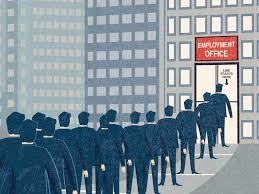

The unemployed are people of working age who are without work, are available for work, and have taken specific steps to find work. The uniform application of this definition results in estimates of unemployment rates that are more internationally comparable than estimates based on national definitions of unemployment. This indicator is measured in numbers of unemployed people as a percentage of the labour force and it is seasonally adjusted. The labour force is defined as the total number of unemployed people plus those in employment. Data are based on labour force surveys (LFS). For European Union countries where monthly LFS information is not available, the monthly unemployed figures are estimated by Eurostat.

Since The period of Covid 19 we have seen that the number of unemployed people all over the world have increased a lot causing many problems . 

Hoping to analyze this data to get some insights on the impact of Covid 19 on Unemployment ....

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode (connected = True)
import warnings
import copy
warnings.filterwarnings("ignore")

# Importing Data

In [ ]:
data=pd.read_csv('../input/oecd-unemployment-rate-2020/2020 unemployment.csv')

# Having First Look At The Data

In [ ]:
data.head()

# World Plot and Unemployment Index Over Years

In [ ]:
s=data['TIME'].str.split('-',expand=True)
data['Year']=s[0]
data['Month']=s[1]
data.drop('TIME',axis=1,inplace=True)
fig1=px.scatter_geo(data,color="Value",locationmode="ISO-3",locations="LOCATION",opacity=0.6,
                     hover_name="LOCATION", size="Value",projection='conic equal area',animation_group ="LOCATION",color_continuous_scale='blackbody',
                     animation_frame="Month",scope='world',symbol='MEASURE',template="plotly_dark",title='Impact of lockdown on employement across world from January to October 2020' )
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400

fig1.update_geos(
    landcolor="white",
    oceancolor="#006994",
    showocean=True,
    lakecolor="LightBlue"
)

fig1.show()

# In Which Month Did We Faced The Highest Amount Of Value

In [ ]:
grouped_month=data.groupby('Month').mean()
px.bar(data_frame=grouped_month,x=grouped_month.index,color=grouped_month.index,y='Value',labels={'x':'Months'})

Well we can clearly see that the highest amount of the rate of unemployment was seen in the months of 5,6 and 7 . These were the months in which there was lockdowns which caused many of the people to get unemployed and destroying many lives .

Well after the 7th month we can see that the rate has declined gradually which shows the time when the lockdowns were unlocking making people go back to their old jobs or getting new jobs making them back to employed :)

# Top 10 Countries hit by the highest rates were

In [ ]:
grouped_countries=data.groupby('LOCATION').mean()
grouped_countries.sort_values('Value',ascending=False,inplace=True)
px.bar(data_frame=grouped_countries.iloc[:10,:],x=grouped_countries.index[:10],color=grouped_countries[:10].index,y='Value',labels={'x':'Countries'})

Highest Unemployment Rate was seen in Columbia followed by Greece and Spain and as we know these are the places that were hit the hardest by the pandemic . 

Every country has been facing this pandemic and hopefully each and every country will be at it's best as soon as possible :)

# 10 Countries Which Took The Lowest Hit In Terms Of Unemployment

In [ ]:
grouped_countries=data.groupby('LOCATION').mean()
grouped_countries.sort_values('Value',ascending=True,inplace=True)
px.bar(data_frame=grouped_countries.iloc[:10,:],x=grouped_countries.index[:10],color=grouped_countries[:10].index,y='Value',labels={'x':'Countries'})

# World Plot And Their Values

We see that the unemployment rate of czechia is the lowest followed by Japan and Poland .

# Importing the data

In [ ]:
data2=pd.read_csv('../input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv')

# Having a look at the data

In [ ]:
data2.head()

# Preprocess the Data

In [ ]:
# Making columns Year And Months
s=data2['DATE'].str.split('-',expand=True)
data2['Year']=s[0]
data2['Month']=s[1]
data2.drop('DATE',axis=1,inplace=True)


In [ ]:
# Dropping the data of 2019
data2.drop(index=0,inplace=True)
grouped_data2=data2.groupby(['CODE','Month']).mean()

In [ ]:
# Getting the column code and Month back
grouped_data2['Code']=np.array(list(grouped_data2.index))[:,0]
grouped_data2['Month']=np.array(list(grouped_data2.index))[:,1]

In [ ]:
# Removing the index for joining
new_data2=pd.DataFrame(grouped_data2.values,columns=grouped_data2.columns)

In [ ]:
# Changing the name of data location to CODE
data.rename(columns={'LOCATION':'Code'},inplace=True)

In [ ]:
# Merging both the data together
new_data=pd.merge(data,new_data2,on=['Code','Month'])

In [ ]:
# Joining Both The Data Together
new_data.head()

# HeatMap Of The Data

In [ ]:
# Removing Year since they are all 2020 and removing Flag Codes since they are all null
new_data.drop('Flag Codes',axis=1,inplace=True)
for i in new_data.columns[6:]:
    new_data[i]=pd.to_numeric(new_data[i])
new_data.drop('Year',axis=1,inplace=True)

In [ ]:
# Plotly code to make a heatmap
x=list(new_data.corr().columns)
y=list(new_data.corr().index)
values=np.array(new_data.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

We can clearly see from the above data that when the value increases which means the rate of unemployment increases there is a negative impact on the GDP of the country 

We can also see the negative impact of value on the HDI (Human development index).

Human Development Index :The Human Development Index is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.

So it means when the value of the rate of unemployment increases it hugely effects the life expectancy, education, and per capita income of the people making them in much bad situation .

We can also see a positive relation between the value of the rate of unemployment and the number of deaths in the country which shows the negative impact of unemployment and the impacts of Covid 19 pandemic

# stringency index change over the months

In [ ]:
px.bar(data_frame=new_data,x='Month',y='STI',color='SUBJECT')

STI : It provides a picture of the stage at which any country enforced its strongest measures. It is of 7 levels and the more strictest a country the more is it's STI .

Well this plot shows that the STI of countries has increased after and during the period of lockdown which is a good thing because more the precautions a country takes better are the chances are for it to go throught the pandemic without taking huge losses .

# HDI vs GDP vs Unemployment Rate

In [ ]:
px.scatter(new_data.groupby('Code').mean(),x='HDI',y='GDPCAP',size='Value',color=new_data.groupby('Code').mean().index)

From this plot we can clearly see the replation between Human Development index and GDPCAP which is a highly positive relation but the second think we can see here is that if the GDPCAP and HDI of a country is low there is a high chance for increase in the unemployment rate of that country . And as the GDP and HDI increases the value decreases .

# Death To Case Ratio Over The World

In [ ]:
x=[]
for i in range(len(new_data)):
    if new_data['TC'].values[i]!=0:
        x.append(new_data['TD'].values[i]/new_data['TC'].values[i])
    else:
        x.append(0)
new_data['Ratio']=x

In [ ]:
fig1=px.scatter_geo(new_data,color="Code",locationmode="ISO-3",locations="Code",opacity=0.6,
                     hover_name="Code", size="Ratio",projection='orthographic',animation_group ="Code",color_continuous_scale='blackbody',
                     animation_frame="Month",scope='world',template="plotly_dark",title='Death to Number of Case Ratio Over the World' )
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400

fig1.update_geos(
    landcolor="white",
    oceancolor="#006994",
    showocean=True,
    lakecolor="LightBlue"
)

fig1.show()

This is a world plot for you to see the death to case ratio all over the world in different months and you can see the increase in the ratio over the months :(

# Changing Some Fields

In [ ]:
# Making a copy of the dataset
data3=copy.deepcopy(new_data)

In [ ]:
# Making Variable For Entereing Categorical Values into the dataset
hdi=[]
val=[]
sti=[]
gdp=[]
# Making the Categories
for i in data3.GDPCAP:
    if i>=10.71:
        gdp.append('Very High GDP')
    elif i>=10.57 and i<10.71:
        gdp.append('High GDP')
    elif i>=10.31 and i<10.57:
        gdp.append('Normal GDP')
    elif i<10.31:
        gdp.append('Low GDP')
for i in data3.STI:
    if i>=4.25:
        sti.append('Very High STI')
    elif i>=3.87 and i<4.25:
        sti.append('High STI')
    elif i>=3.25 and i<3.87:
        sti.append('Normal STI')
    else:
        sti.append('Low STI')
for i in data3.HDI:
    if i>=0.92:
        hdi.append('Very High HDI')
    elif i>=0.90 and i<0.92:
        hdi.append('High HDI')
    elif i>=0.87 and i<0.90:
        hdi.append('Normal HDI')
    else:
        hdi.append('Low HDI')
for i in data3.Value:
    if i>=8.7:
        val.append('Very High Value')
    elif i<8.7 and i>=5.7:
        val.append('High Value')
    elif i<5.7 and i>=4.2:
        val.append('Normal Value')
    else:
        val.append('Low Value')
# Entering the values into the dataframe
data3['Value']=val
data3['HDI']=hdi
data3['GDPCAP']=gdp
data3['STI']=sti


# Parallel Category Plot Between Value HDI STI and GDPCAP

In [ ]:
fig = px.parallel_categories(data3, dimensions=['Value','HDI','STI','GDPCAP'],
                 color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

This is a parallel category plot for the fields HDI STI Value and GDPCAP which shows the relation between the features using the number of count of one typeof condition leading to another condition for example :
8 count of Top High Value Leads to High GDP but we can see 24 count of Low value actually leads to high GDP . So we can actually see the relations :)

# Hope you liked the file :)

# Thank you :)
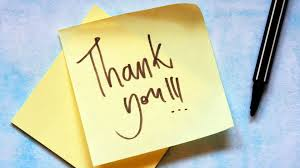